# SOURCE
https://www.kaggle.com/datasets/kriegsmaschine/polish-it-job-board-data-from-2022

# Create venv
python3 -m venv venv
# Activate venv
source venv/bin/activate
# On powershell
venv\Scripts\Activate.ps1
# Install dependencies
pip install -r requirements.txt

In [6]:
# import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# read in data
df = pd.read_csv('bq-results-20221120-171341-1668964430142.csv')

# check data
df.head()

,Title,City,Country_code,Marker_icon,Workplace_type,Experience_level,Published_at,Remote_interview,Remote,Open_to_hire_Ukrainians,...,salary_from_other,salary_to_other,salary_currency_other,currency_exchange_rate,skills_name_0,skills_value_0,skills_name_1,skills_value_1,skills_name_2,skills_value_2
0,Senior Frontend Software Engineer,London,GB,javascript,remote,senior,2022-07-31T11:00:14.548Z,True,True,True,...,0,0,unknown,0.176806,React,5,TypeScript,5,unknown,0
1,Sr. Backend Engineer,Berlin,DE,java,remote,senior,2022-07-07T10:25:00.000Z,True,True,True,...,0,0,unknown,0.179577,Kotlin,3,Backend,4,Java,4
2,Sr. Backend Engineer,Katowice,PL,java,remote,senior,2022-05-31T11:32:00.000Z,True,True,True,...,0,0,unknown,0.185871,Kotlin,3,Backend,4,Java,4
3,Sr. Backend Engineer,London,GB,java,remote,senior,2022-05-25T17:06:36.442Z,True,True,True,...,0,0,unknown,0.184581,Kotlin,3,Backend,4,Java,4
4,Python Developer (4 days/week),Białystok,PL,python,remote,mid,2022-06-30T14:57:00.000Z,True,True,False,...,0,0,unknown,0.182969,Flask,3,English,4,Python,4


<AxesSubplot: >

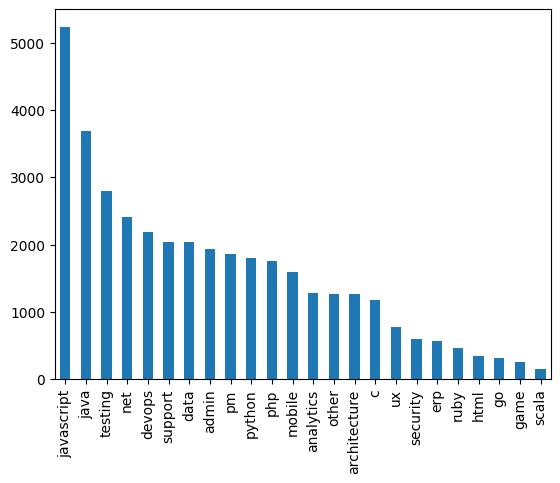

In [8]:
# show a column chart of tags used
df['Marker_icon'].value_counts().plot(kind='bar')

[Text(0, 0, '8436'), Text(0, 0, '16997'), Text(0, 0, '24268')]

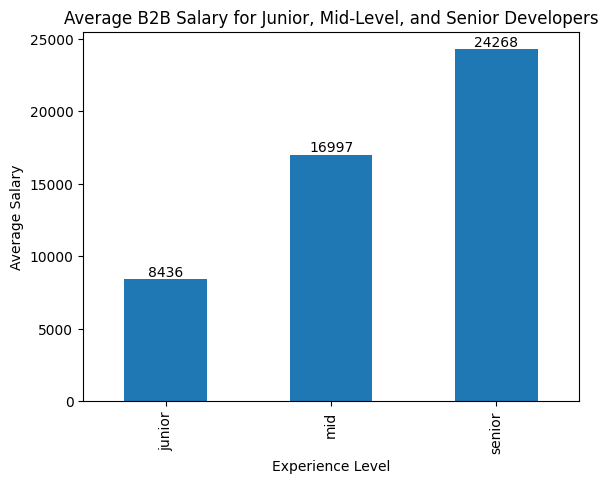

In [26]:
# calculate the average b2b salary for junior, mid-level, and senior developers
# based on average of salary_from_b2b and salary_to_b2b

# drop rows with missing 0 values
avg_df = df[df['salary_from_b2b'] != 0]
avg_df = avg_df[avg_df['salary_to_b2b'] != 0]

# create a new column with the average salary
avg_df['avg_salary_b2b'] = (avg_df['salary_from_b2b'] + avg_df['salary_to_b2b']) / 2

# show a column chart of average b2b salary for junior, mid-level, and senior developers
# add a title and labels above columns
mean_plt = avg_df.groupby('Experience_level')['avg_salary_b2b'].mean().plot(kind='bar')
mean_plt.set_title('Average B2B Salary for Junior, Mid-Level, and Senior Developers')
mean_plt.set_xlabel('Experience Level')
mean_plt.set_ylabel('Average Salary')
mean_plt.bar_label(mean_plt.containers[0], fmt='%.0f')

[Text(0, 0, '7500'), Text(0, 0, '16500'), Text(0, 0, '23233')]

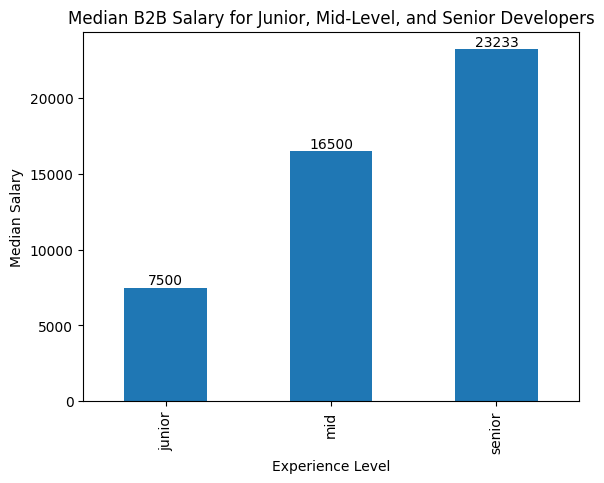

In [23]:
# show the same chart as above, but for median salary
med_plt = avg_df.groupby('Experience_level')['avg_salary_b2b'].median().plot(kind='bar')
med_plt.set_title('Median B2B Salary for Junior, Mid-Level, and Senior Developers')
med_plt.set_xlabel('Experience Level')
med_plt.set_ylabel('Median Salary')
med_plt.bar_label(med_plt.containers[0], fmt='%.0f')